In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [4]:
series = pd.read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)

<ipython-input-3-3ceae1076e88>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


In [5]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [6]:
# create lagged dataset

In [7]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [8]:
# split into train and test sets

In [9]:
X = dataframe.values
train_size = int(len(X) * 0.66)

In [10]:
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [13]:
train_X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6])

In [14]:
train_y

array([145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9,
       336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. , 226. ,
       303.6, 289.9, 421.6, 264.5])

In [11]:
test_X

array([264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5,
       407.6, 682. , 475.3, 581.3])

In [12]:
test_y

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [15]:
# persistence model

In [16]:
def model_persistence(x):
    return x

In [17]:
# walk-forward validation

In [18]:
predictions = list()

In [19]:
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

In [21]:
test_X

array([264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5,
       407.6, 682. , 475.3, 581.3])

In [22]:
predictions

[264.5,
 342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0,
 475.3,
 581.3]

In [23]:
test_y

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [20]:
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


In [ ]:
# plot predictions and expected results

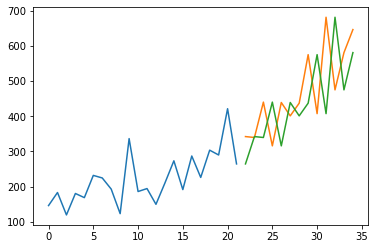

In [24]:
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [25]:
# Line plot of the persistence forecast for the Shampoo Sales dataset showing the
# training set (blue), test set (green) and predictions (red).